In [1]:
import os
import torch
from datetime import datetime
import numpy as np
from multiprocessing import Pool, cpu_count
from bandit_task import TwoArmedBandit
from model import RNNActorCritic
from episode import collect_bandit_trajectory
from reptile_bandit_training import *

base_unix = "/storage1/fs1/shinung/Active/jackosvky/LearningToLearn"
base_windows = "//storage1.ris.wustl.edu/shinung/Active/jackosvky/LearningToLearn"
base_mac = "/Volumes/shinung/Active/jackosvky/LearningToLearn"

'''# Check which base path exists
if os.path.exists(base_unix):
    base = base_unix
elif os.path.exists(base_windows):
    base = base_windows
elif os.path.exists(base_mac):
    base = base_mac
else:
    base = os.getcwd()
    print(f"None of the base paths are available. Creating folder in the current directory: {base}")

#current_time = "2026-02-17_21-48-26"
current_time = "2026-02-19_17-21-56"
new_folder = os.path.join(base, current_time)
#os.makedirs(new_folder, exist_ok=True)
os.chdir(new_folder)  '''

'# Check which base path exists\nif os.path.exists(base_unix):\n    base = base_unix\nelif os.path.exists(base_windows):\n    base = base_windows\nelif os.path.exists(base_mac):\n    base = base_mac\nelse:\n    base = os.getcwd()\n    print(f"None of the base paths are available. Creating folder in the current directory: {base}")\n\n#current_time = "2026-02-17_21-48-26"\ncurrent_time = "2026-02-19_17-21-56"\nnew_folder = os.path.join(base, current_time)\n#os.makedirs(new_folder, exist_ok=True)\nos.chdir(new_folder)  '

In [2]:
# Instantiate and train
model = RNNActorCritic(input_size=3, hidden_size=32, action_size=2)  # input = 2 (action) + 1 (reward)
model.load_state_dict(torch.load("reptile_bandit_model.pth", weights_only=True))

# Test the trained model
test_p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
test_results = test_model_performance(
    model, 
    p_values=test_p_values,
    n_test_episodes=10,
    n_rounds=50,
    inner_steps=10,  # Test zero-shot performance (set to 5 for few-shot adaptation)
    inner_lr=0.02,
    return_trajectories=True
)



TESTING MODEL PERFORMANCE

p = 0.10 (Switch prob: 0.49, Expected reward with switches: variable)
  Avg Reward: 26.20 ± 2.56 (out of 50)
  Avg Optimal Arm Selection: 52.8% ± 6.6%
  Efficiency (vs static max): 58.2%

p = 0.30 (Switch prob: 0.38, Expected reward with switches: variable)
  Avg Reward: 26.60 ± 2.24 (out of 50)
  Avg Optimal Arm Selection: 51.2% ± 3.4%
  Efficiency (vs static max): 76.0%

p = 0.50 (Switch prob: 0.62, Expected reward with switches: variable)
  Avg Reward: 27.10 ± 3.27 (out of 50)
  Avg Optimal Arm Selection: 0.8% ± 1.3%
  Efficiency (vs static max): 108.4%

p = 0.70 (Switch prob: 0.48, Expected reward with switches: variable)
  Avg Reward: 24.50 ± 3.58 (out of 50)
  Avg Optimal Arm Selection: 50.4% ± 3.9%
  Efficiency (vs static max): 70.0%

p = 0.90 (Switch prob: 0.71, Expected reward with switches: variable)
  Avg Reward: 25.20 ± 4.42 (out of 50)
  Avg Optimal Arm Selection: 49.6% ± 7.9%
  Efficiency (vs static max): 56.0%

SUMMARY
Overall Average Reward: 

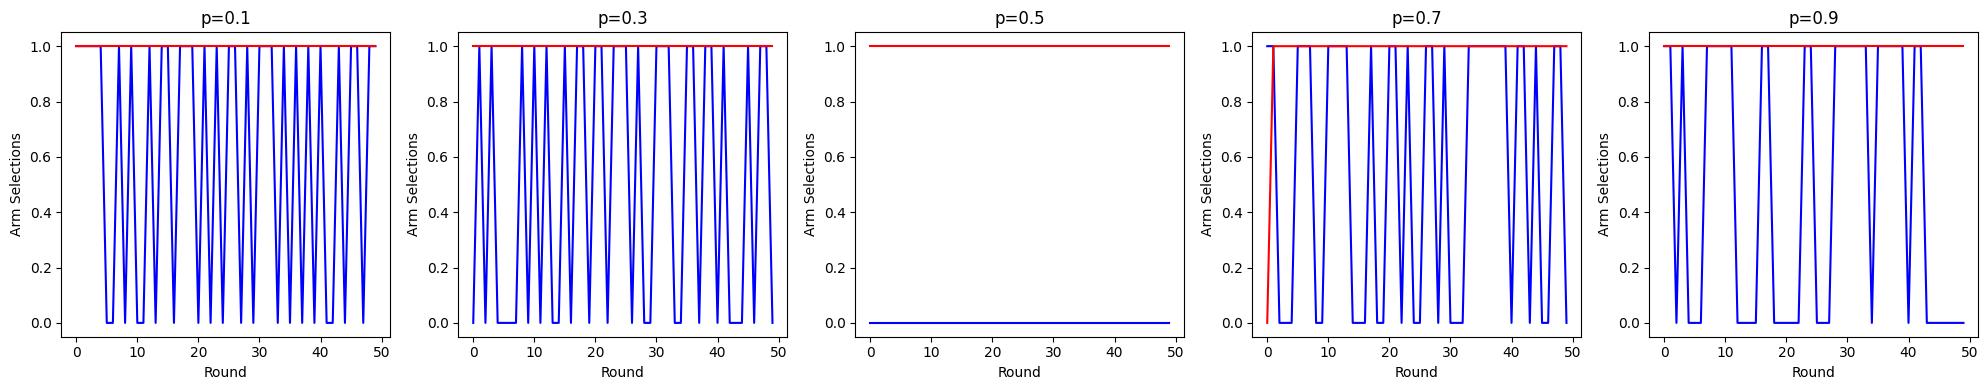

In [3]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, len(test_p_values), figsize=(20, 4))
for i, p in enumerate(test_p_values):
    axes[i].plot(test_results[p]['optimal_arms'][0], c='blue', label='Arm Selections')
    axes[i].plot(test_results[p]['arm_selections'][0], c='red', label='Episode Rewards')
    axes[i].set_title(f"p={p}")
    axes[i].set_xlabel("Round")
    axes[i].set_ylabel("Arm Selections")
plt.tight_layout()
plt.show()


In [4]:
np.random.uniform(0.0, 1.0)  # Randomize switch probability for more diverse tasks

0.0753589523875352

In [5]:
test_results[test_p_values[-1]]['optimal_arms'][0]

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
test_results[test_p_values[-1]]['arm_selections'][0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]